# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
# Preview of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Summary of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Statistical summary of columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking for nulls
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies


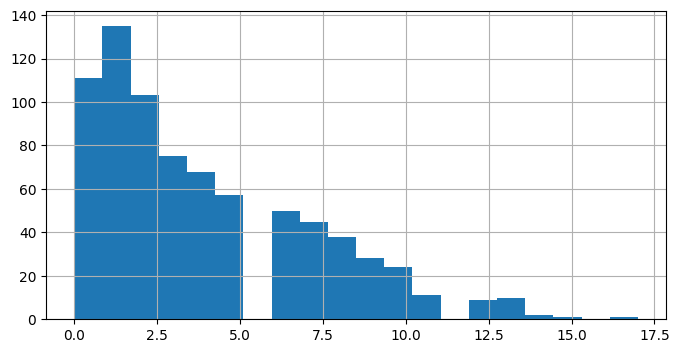

Glucose


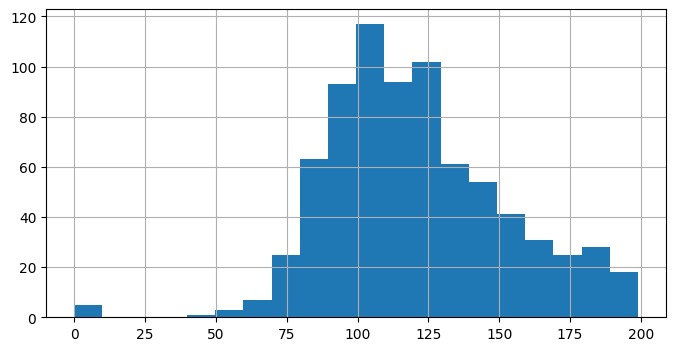

BloodPressure


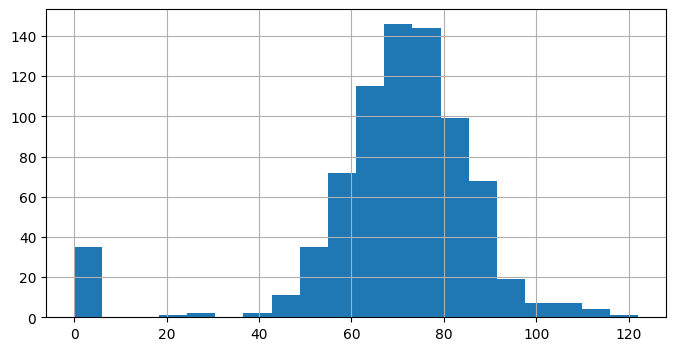

SkinThickness


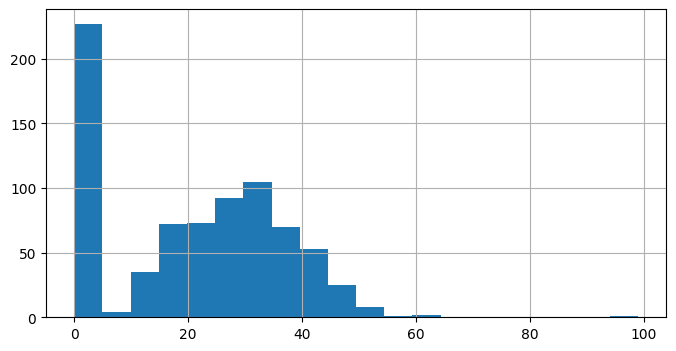

Insulin


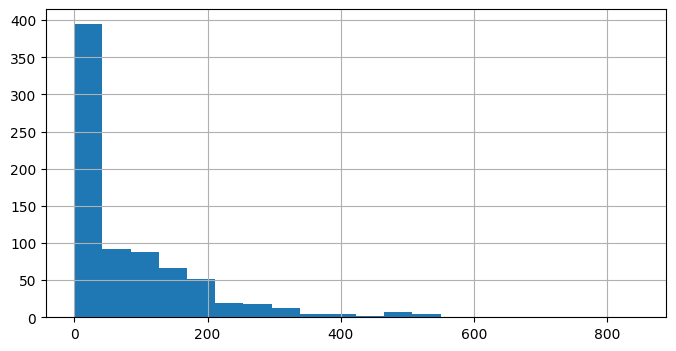

BMI


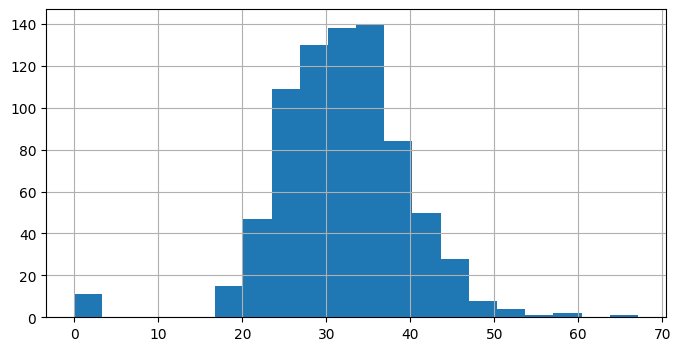

DiabetesPedigreeFunction


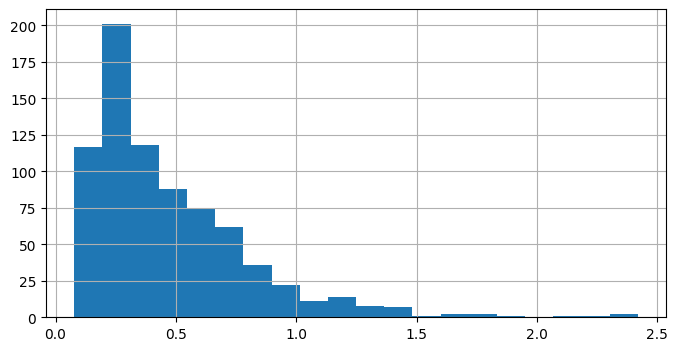

Age


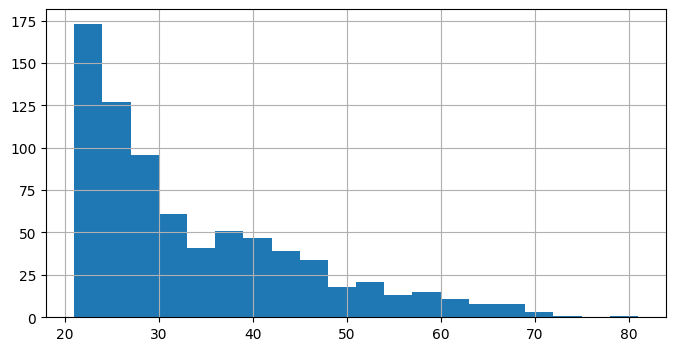

Outcome


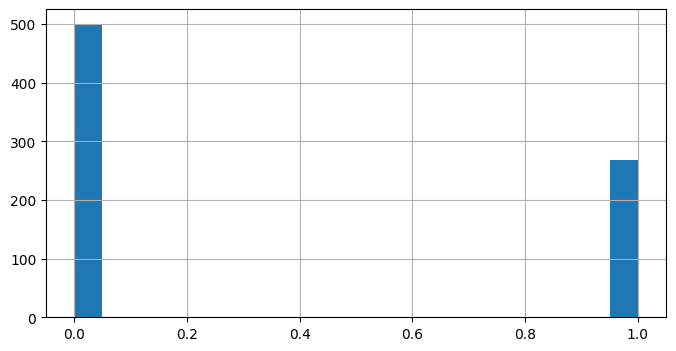

In [7]:
# Print out a histogram for each column
# Set a bin size, can be changed as necessary
bin_size = 20

for column in df.columns:
  print(column)
  df[column].hist(bins=bin_size, figsize=(8,4))
  plt.show()

In [8]:
# Create two dataframes to separate those without and those with diabetes
not_diabetic = df[df['Outcome'] == 0].drop('Outcome', axis=1)
diabetic = df[df['Outcome'] == 1].drop('Outcome', axis=1)

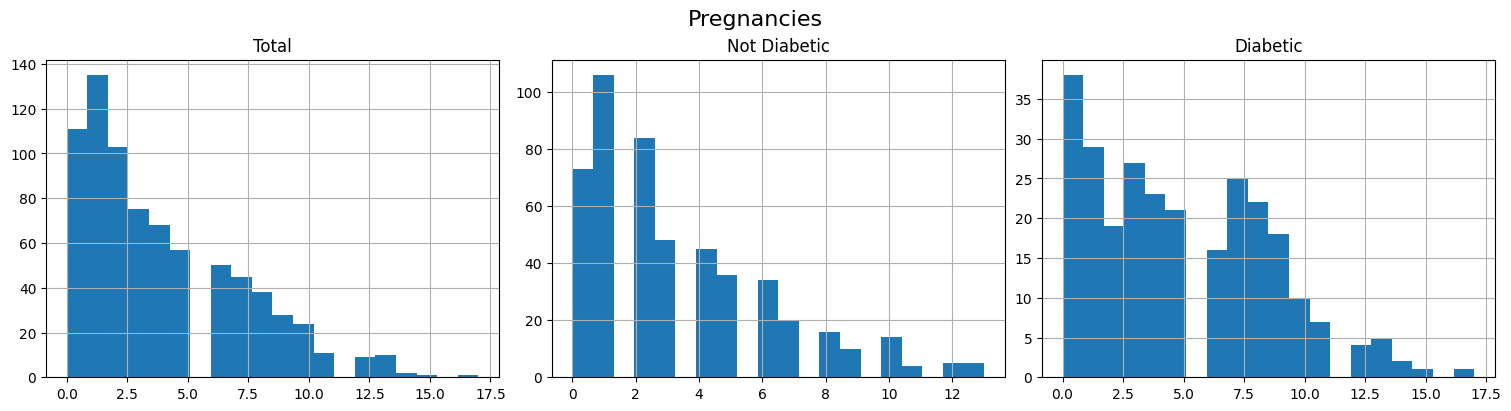

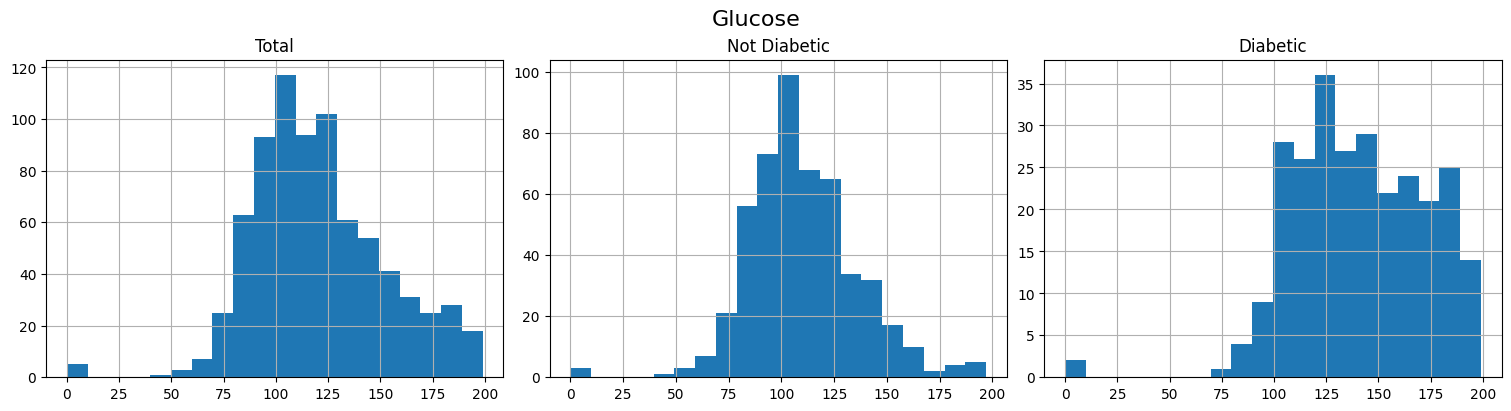

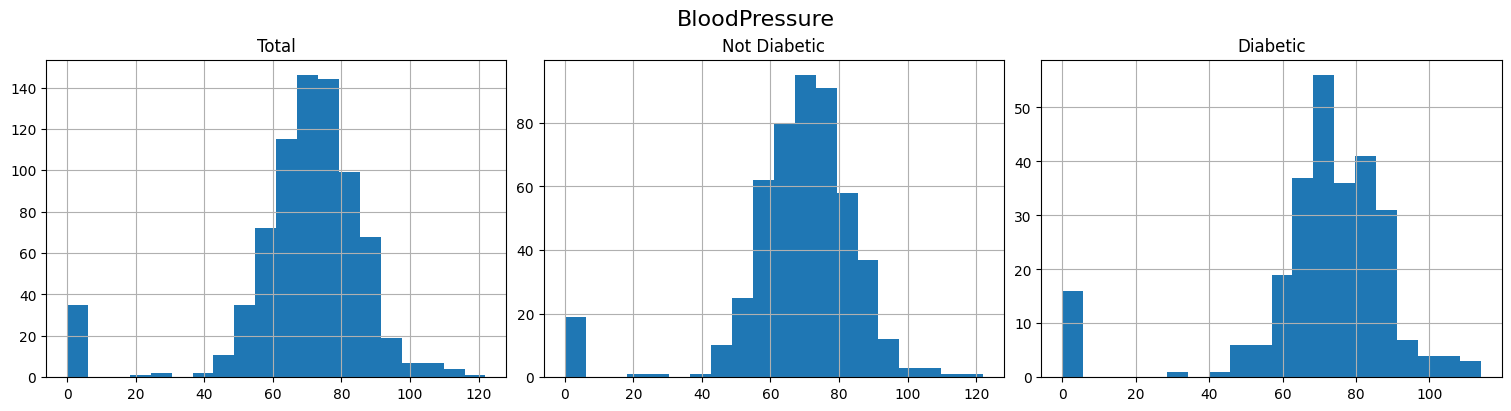

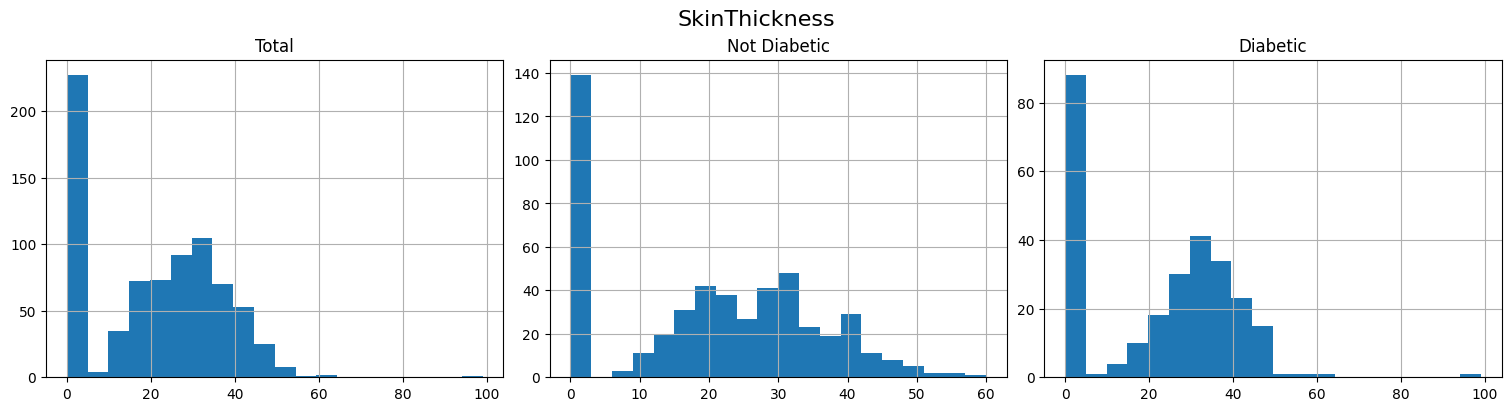

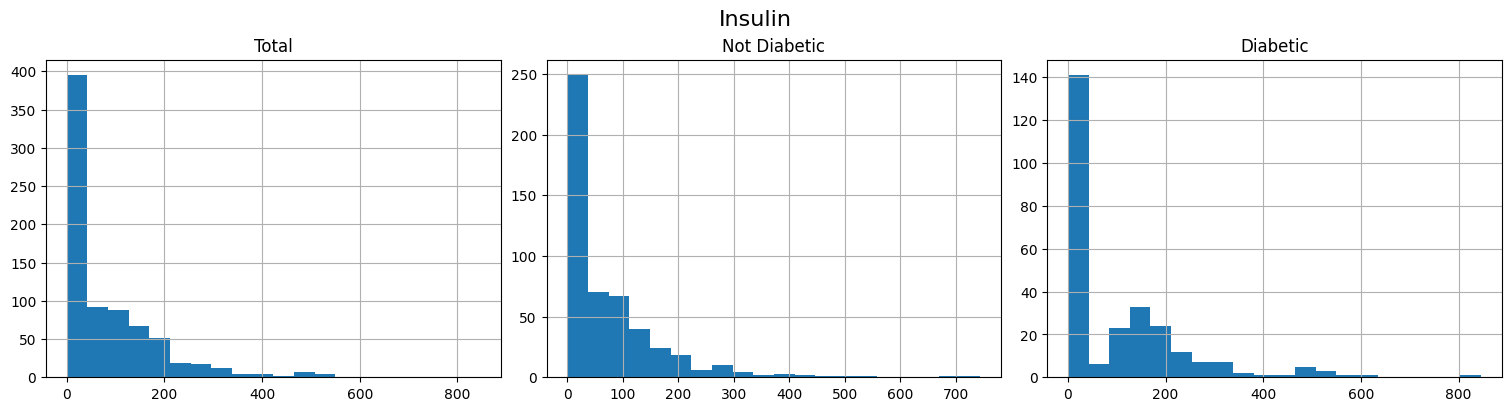

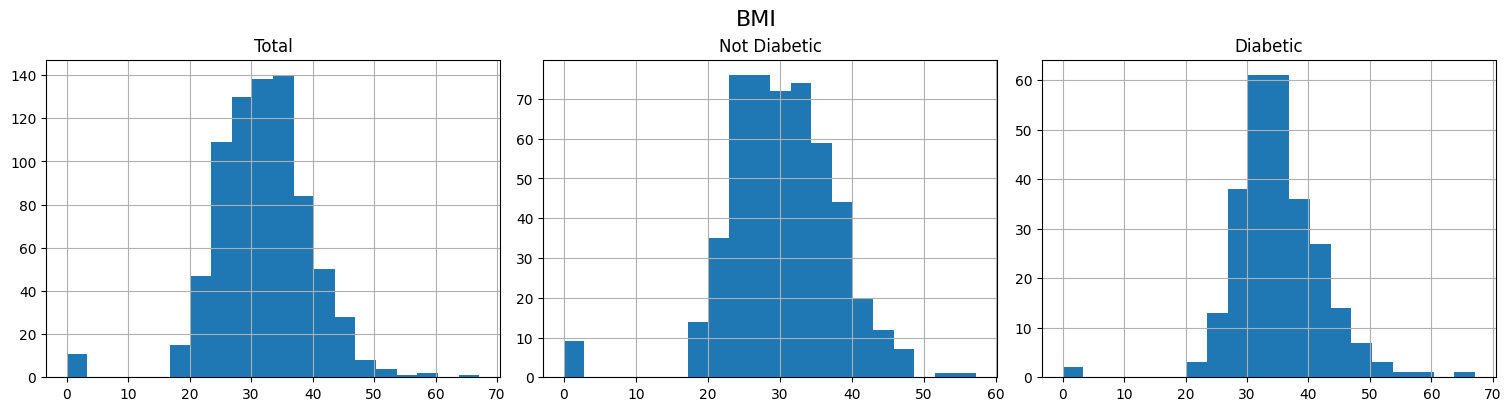

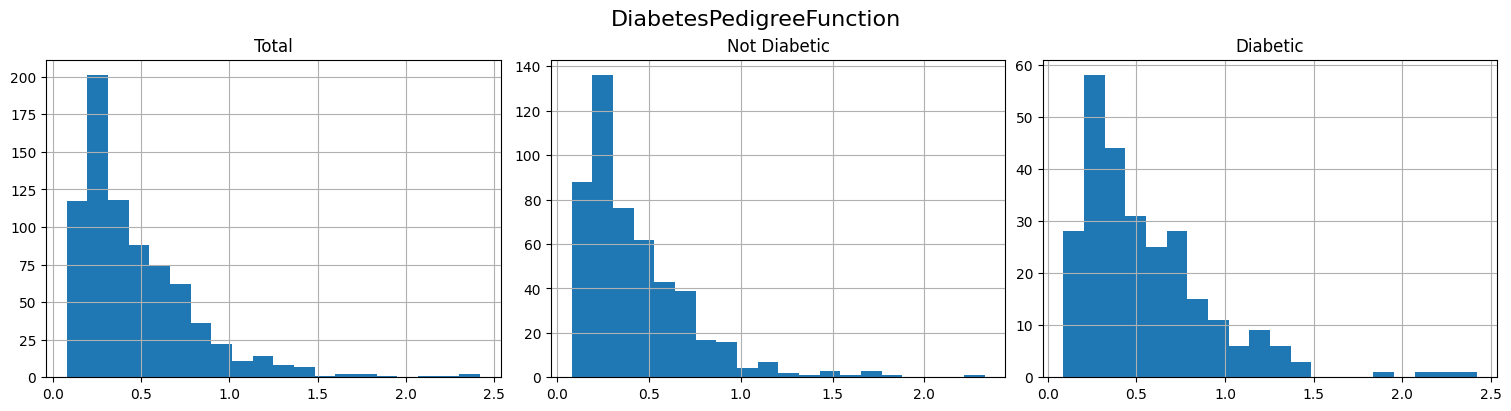

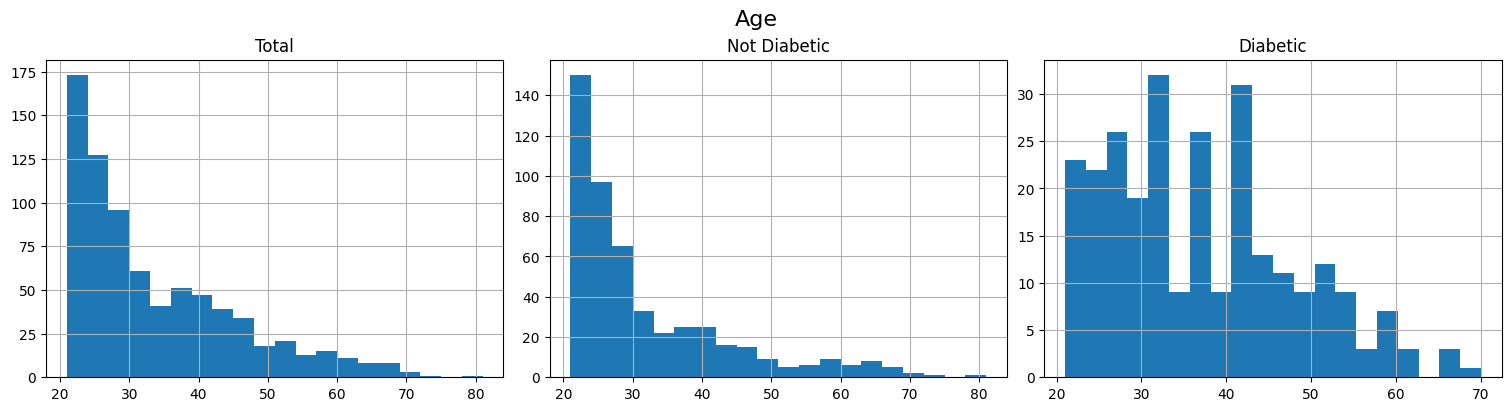

In [9]:
# Print out histograms side-by-side to compare distributions
for column in diabetic.columns:
    fig, axes = plt.subplots(1, 3, figsize=(15,4), layout='constrained')
    fig.suptitle(column, fontsize=16)
    axes[0].set_title('Total')
    axes[1].set_title('Not Diabetic')
    axes[2].set_title('Diabetic')
    df[column].hist(bins=bin_size, ax=axes[0])
    not_diabetic[column].hist(bins=bin_size, ax=axes[1])
    diabetic[column].hist(bins=bin_size, ax=axes[2])
    plt.show()

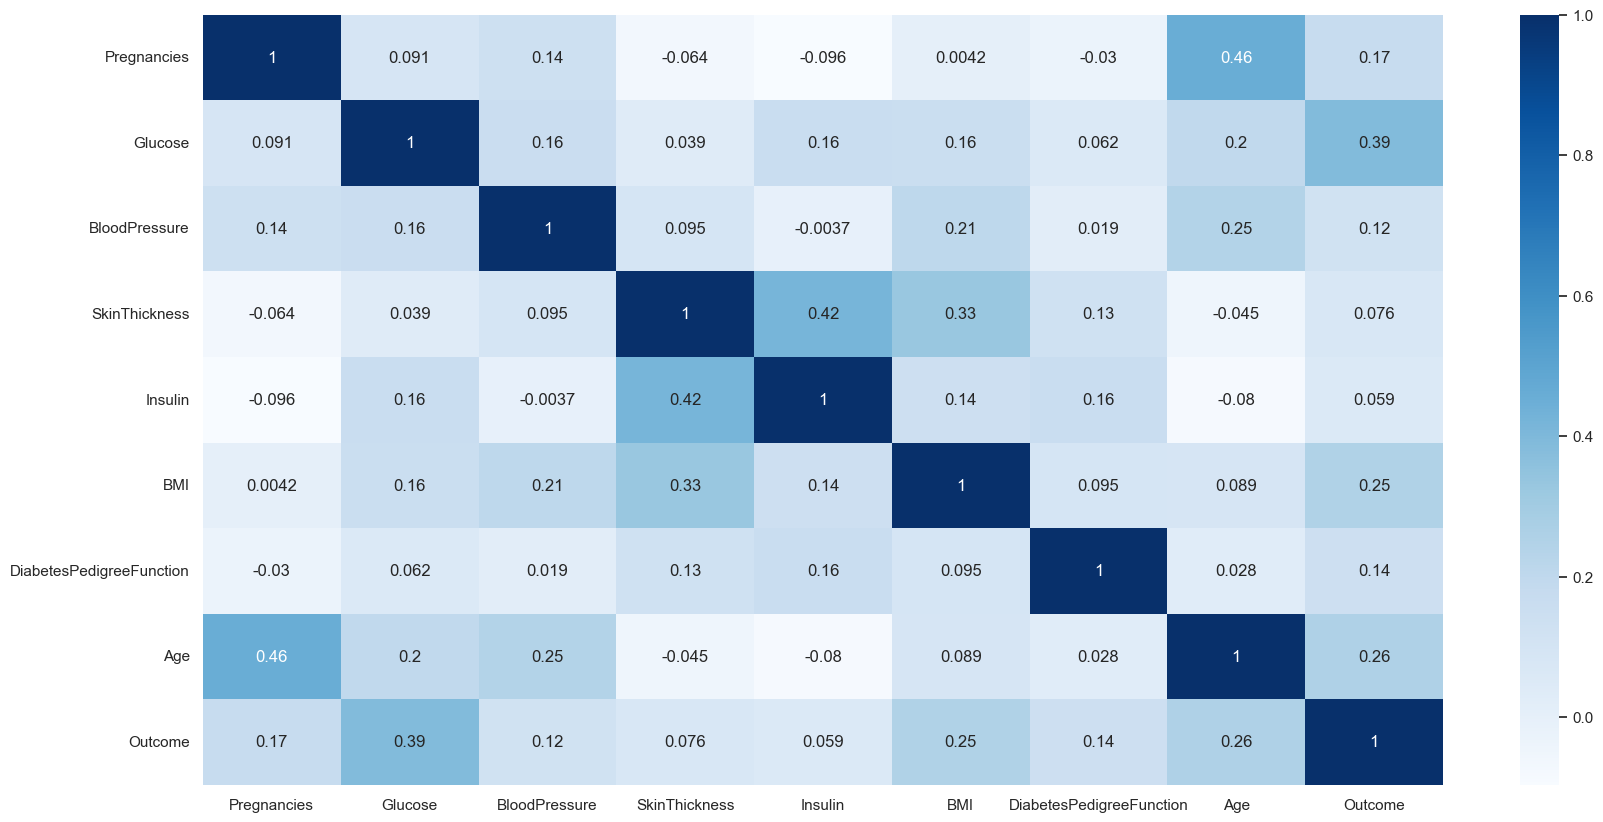

In [10]:
# Create a correlation matrix, using Kendall-Tau method since data doesn't follow normal distribution
df_corr = df.corr(method='kendall', numeric_only=True)

# Display a heatmap of the correlation matrix
sns.set(rc={"figure.figsize":(20, 10)})
sns.heatmap(df_corr, annot=True, annot_kws={'size': 12}, cmap='Blues')
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [11]:
# Check the glucose column for outliers
# The numerical range indicates that the unit is in mg/dL, and the upper range is fine in this dataset
# According to disbetesstrong.com, having 40 mg/dL or lower is potentially fatal, so we'll check for that
df[df['Glucose'] <= 40]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [12]:
# Since there are only five entries with unrealistically low glucose levels, we'll remove these
df = df[df['Glucose'] > 40]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Check the blood pressure column for outliers
df[df['BloodPressure'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [14]:
df[df['BloodPressure'] <= 0].shape

(35, 9)

In [15]:
# Since it's only 4.6% of the dataframe that's got these entries, we'll drop them
df = df[df['BloodPressure'] > 0]

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,3.862637,121.873626,72.438187,21.388736,84.152473,32.288736,0.476518,33.394231,0.343407
std,3.363422,30.679207,12.386109,15.729793,116.819934,7.277660,0.334851,11.849692,0.475172
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.250000,80.000000,33.000000,130.000000,36.600000,0.629500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# Check the skin thickness column for outliers
df[df['SkinThickness'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [18]:
# Since there are a significant number of entries, we will impute values later
# Check the insulin column for outliers
df[df['Insulin'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
9,8,125,96,0,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
# Since there are a significant number of entries, we will impute values later
# Check the BMI column for outliers
df[df['BMI'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
684,5,136,82,0,0,0.0,0.640,69,0


In [20]:
# There are only 4 entries so we'll drop them
df = df[df['BMI'] > 0]

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [22]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [23]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [24]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Since the scaled data got converted into numpy arrays, better to convert them back to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [26]:
print(X_train_scaled, '\n', X_test_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      -1.143398  1.860116      -1.731795       0.934288  0.673891  0.766203   
1      -0.845991  0.219661       0.771458      -0.281192  0.887685 -0.736100   
2      -1.143398  0.251826       0.615005      -1.368727 -0.742494 -0.196438   
3       0.343636 -1.163468       0.145645       0.038671 -0.742494 -0.517318   
4      -1.143398 -0.262826       0.302098      -1.368727 -0.742494  0.109857   
..           ...       ...            ...            ...       ...       ...   
574    -1.143398 -0.777479      -0.636622       0.934288  0.148314  0.620348   
575     0.046229  0.219661      -0.167262      -1.368727 -0.742494  0.255712   
576    -0.251178 -1.324297       0.771458       0.614424 -0.118928  0.241126   
577     2.425484  0.959474      -0.167262       1.190178  1.671596  1.349621   
578    -1.143398  0.798645       0.771458      -1.368727 -0.742494  1.160010   

     DiabetesPedigreeFunction       Age

In [27]:
# Try a basic logistic regression model first with some cross validation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=1, random_state=69)
lr.fit(X_train_scaled, y_train)

LogisticRegression(n_jobs=1, random_state=69)

In [28]:
# Make predictions using the test set
y_pred = lr.predict(X_test_scaled)

In [29]:
# Predict the probabilities
y_pred_proba = lr.predict_proba(X_test_scaled)

In [30]:
# Evaluate the model using accuracy, precision, recall, F1, ROC and AUC
# Plot a confusion matrix and ROC graph too
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, auc

In [31]:
# First, build a function to print a confusion matrix
def print_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [32]:
# Build a function to print accuracy, precision, recall and F1 scores
def print_scores(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F-score:", f1_score(y_test, y_pred))
    print("ROC-AUC-score:", roc_auc_score(y_test, y_pred))

In [33]:
# Build a function to plot the ROC curve and print the AUC
def print_roc_auc(y_test, y_pred_proba):
    fpr, tpr, thresh = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, label=str(roc_auc))
    plt.legend()
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

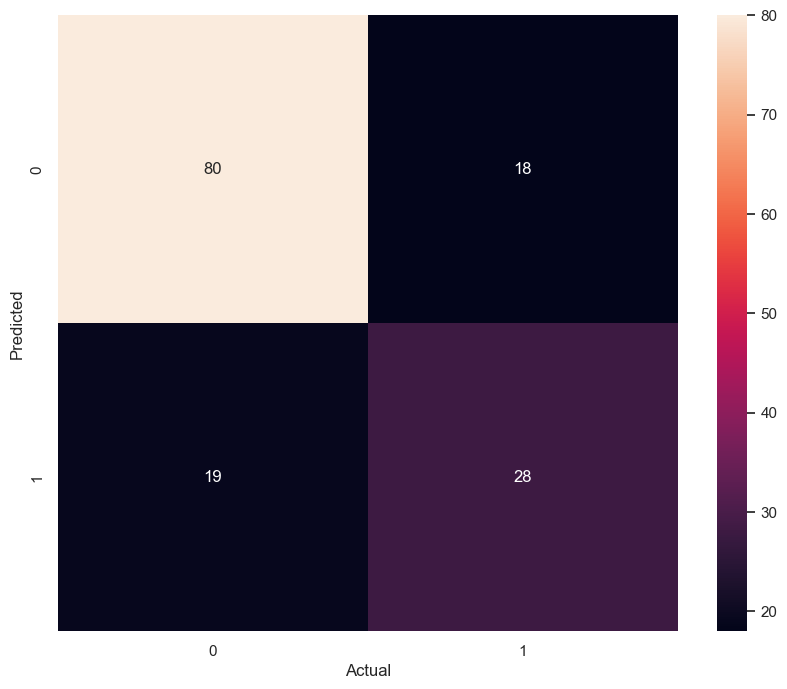

In [34]:
# Print the confusion matrix for the regression model
print_cm(y_test, y_pred)

In [35]:
# Print the accuracy, precision and recall scores for the regression model
print_scores(y_test, y_pred)

Accuracy: 0.7448275862068966
Precision: 0.6086956521739131
Recall: 0.5957446808510638
F-score: 0.6021505376344086
ROC-AUC-score: 0.7060356057316544


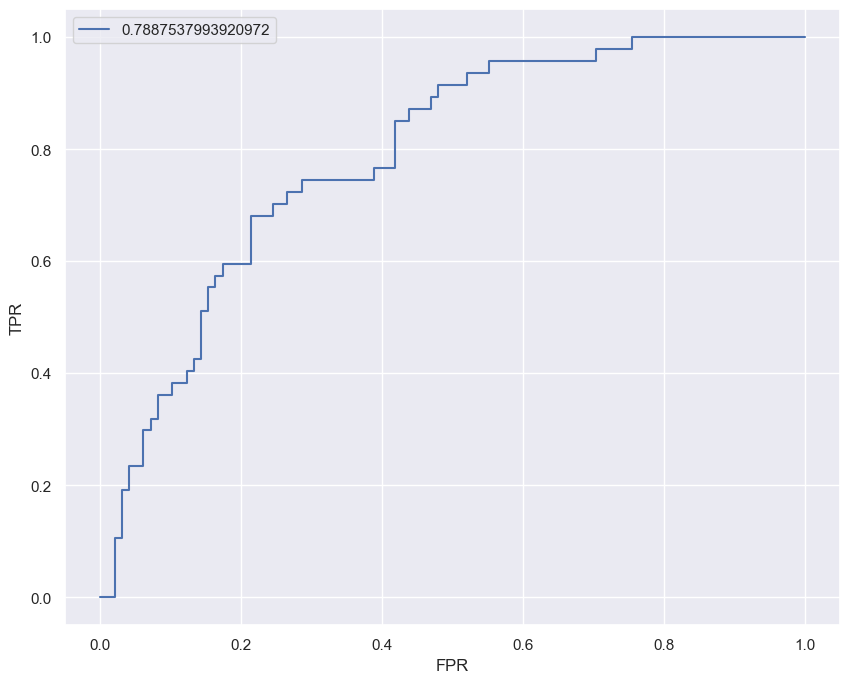

In [36]:
# Print the ROC
print_roc_auc(y_test, y_pred_proba[:, 1])

In [37]:
# Build a random forest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)

In [38]:
# Fit the model using the scaled training set
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [39]:
# Get the parameters of the model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Find the depth of the "deepest" tree
max_depth_clf = 0
for estimator in clf.estimators_:
    if max_depth_clf < estimator.tree_.max_depth:
        max_depth_clf = estimator.tree_.max_depth

print(max_depth_clf)

20


In [41]:
# Make predictions using the random forest model
y_pred_rf = clf.predict(X_test)
y_pred_proba_rf = clf.predict_proba(X_test)

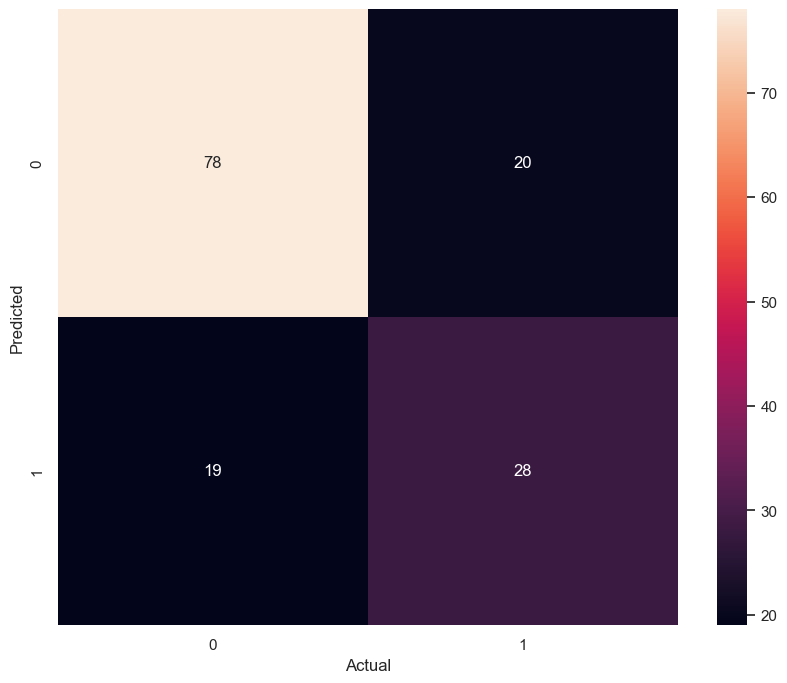

Accuracy: 0.7310344827586207
Precision: 0.5833333333333334
Recall: 0.5957446808510638
F-score: 0.5894736842105263
ROC-AUC-score: 0.6958315240990013


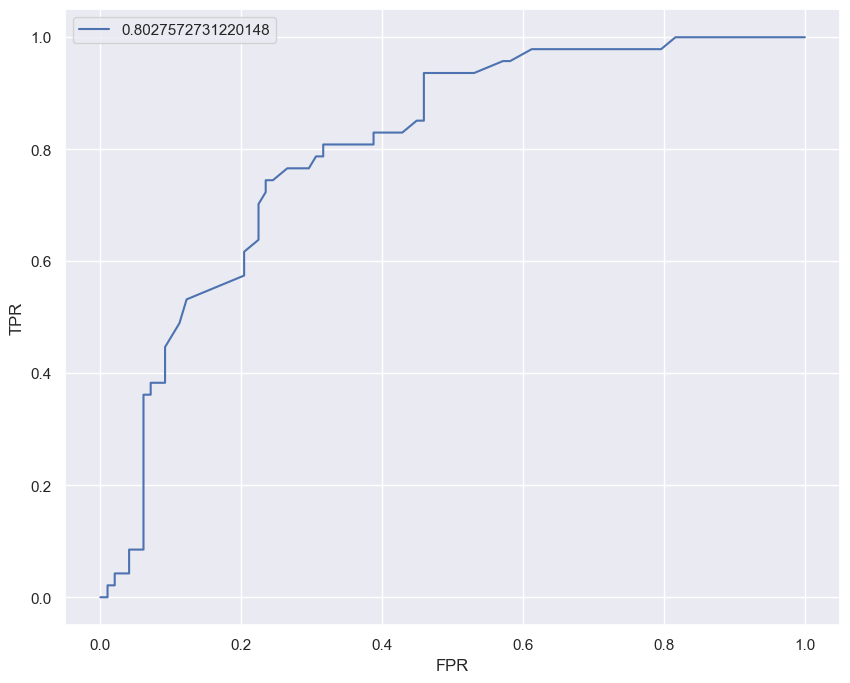

In [42]:
# Print the evaluation metrics of this model
print_cm(y_test, y_pred_rf)
print_scores(y_test, y_pred_rf)
print_roc_auc(y_test, y_pred_proba_rf[:, 1])

In [43]:
# Try a grid search with random forest to see if results improve further
from sklearn.model_selection import GridSearchCV

In [46]:
# Create parameters to use for the parameter grid
# Max depth set to be in between 15 and 25
# Number of trees set to be in between 100 and 200
max_depth = np.arange(15, 26, 1, dtype=int).tolist()
n_trees = np.arange(100, 201, 1, dtype=int).tolist()
space = {'n_estimators': n_trees, 'max_depth': max_depth}

In [47]:
# Use grid search to fit a model (WARNING, CPU INTENSIVE, RUN IF YOU HAVE A FAST PROCESSOR WITH MANY CORES OTHERWISE THE EXECUTION TIME WILL BE VERY LONG)
clf = RandomForestClassifier()
search = GridSearchCV(estimator=clf, param_grid=space, cv=10, n_jobs=-1)
result = search.fit(X, y)

In [48]:
# Get the best parameters
best_max_depth = result.best_params_['max_depth']
best_n_estimators = result.best_params_['n_estimators']
print('Best max depth:', best_max_depth, '\nBest number of trees:', best_n_estimators, '\nScore:', result.best_score_)

Best max depth: 17 
Best number of trees: 153 
Score: 0.7846841704718417


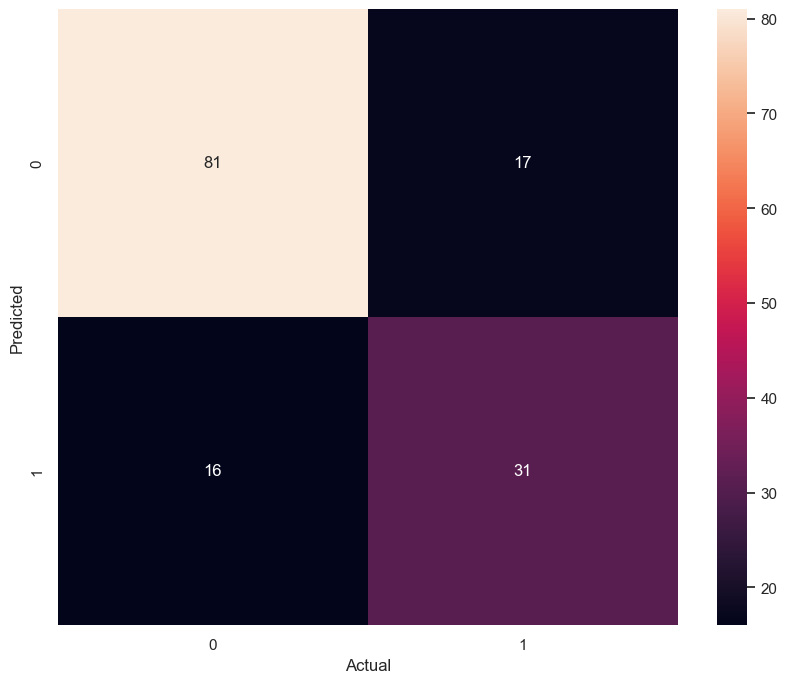

Accuracy: 0.7724137931034483
Precision: 0.6458333333333334
Recall: 0.6595744680851063
F-score: 0.6526315789473683
ROC-AUC-score: 0.7430525401650022


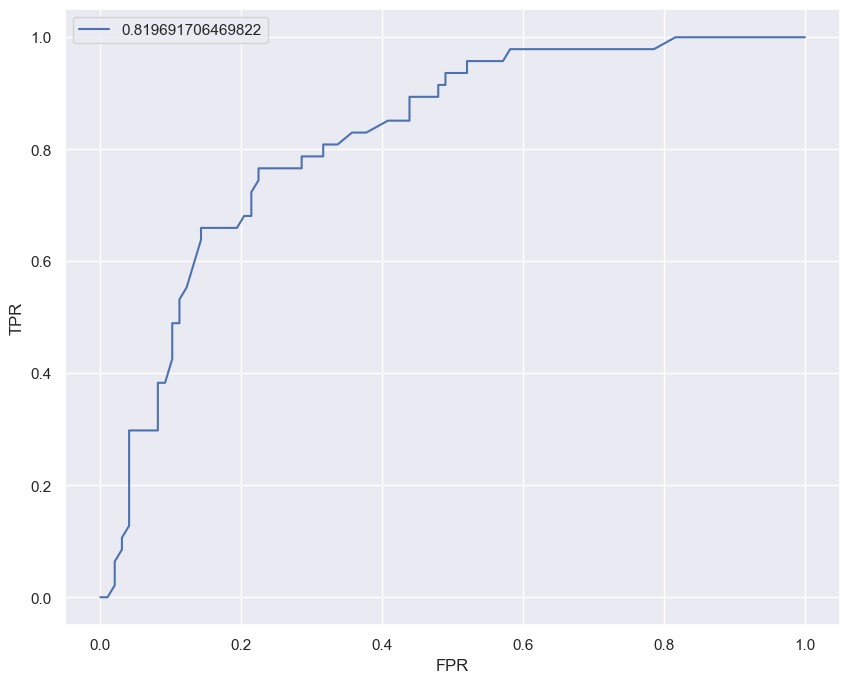

In [49]:
# Build a random forest model using the best parameters and evaluate
clf = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)
y_pred_proba_rf = clf.predict_proba(X_test)

print_cm(y_test, y_pred_rf)
print_scores(y_test, y_pred_rf)
print_roc_auc(y_test, y_pred_proba_rf[:, 1])

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.